In [2]:
# Test: Kütüphaneler yüklendi mi?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
import geopandas as gpd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

print("✅ Tüm kütüphaneler başarıyla import edildi!")
print(f"Pandas versiyon: {pd.__version__}")
print(f"NumPy versiyon: {np.__version__}")

✅ Tüm kütüphaneler başarıyla import edildi!
Pandas versiyon: 2.3.3
NumPy versiyon: 2.2.5


In [3]:
# Veriyi yükle
df_kaggle = pd.read_csv('../data/cleaned/kaggle_cleaned.csv')
df_emdat = pd.read_excel('../data/raw/turkey_earthquakes_emdat.xlsx')

print("="*60)
print("KAGGLE CLEANED DATASET")
print("="*60)
print(f"Toplam satır sayısı: {len(df_kaggle):,}")
print(f"Toplam sütun sayısı: {len(df_kaggle.columns)}")
print(f"\nSütunlar:\n{df_kaggle.columns.tolist()}")
print(f"\nİlk 5 satır:")
df_kaggle.head()

KAGGLE CLEANED DATASET
Toplam satır sayısı: 19,196
Toplam sütun sayısı: 14

Sütunlar:
['Index', 'Date', 'Time_raw', 'Latitude', 'Longitude', 'Depth', 'Location', 'Year', 'Month', 'Day', 'Datetime', 'Magnitude', 'Time', 'Location_clean']

İlk 5 satır:


,Index,Date,Time_raw,Latitude,Longitude,Depth,Location,Year,Month,Day,Datetime,Magnitude,Time,Location_clean
0,1,2023-12-31,22:28:46.510000,37.4900,43.7095,2.6,BAYKOY- (HAKKARI) [SOUTH 6.8 KM],2023,12,31,2023-12-31 22:28:46.510,3.8,22:28:46.510000,HAKKARI
1,2,2023-12-31,17:06:05.420000,37.4405,43.9263,5.0,YAZILI-YUKSEKOVA (HAKKARI) [SOUTH WEST 3.6 KM],2023,12,31,2023-12-31 17:06:05.420,4.5,17:06:05.420000,HAKKARI
2,3,2023-12-31,16:53:04.130000,37.4942,43.6955,5.0,CIMENLI- (HAKKARI) [EAST 6.1 KM],2023,12,31,2023-12-31 16:53:04.130,3.5,16:53:04.130000,HAKKARI
3,4,2023-12-31,16:37:55.840000,37.4763,43.6965,5.0,CIMENLI- (HAKKARI) [SOUTH EAST 6.3 KM],2023,12,31,2023-12-31 16:37:55.840,4.6,16:37:55.840000,HAKKARI
4,5,2023-12-30,20:43:24.210000,40.2272,29.1705,12.9,GURSU (BURSA) [NORTH WEST 2.2 KM],2023,12,30,2023-12-30 20:43:24.210,3.6,20:43:24.210000,BURSA


In [4]:
# Temel istatistikler
print("="*60)
print("SAYISAL SÜTUNLAR İÇİN İSTATİSTİKLER")
print("="*60)
df_kaggle.describe()

SAYISAL SÜTUNLAR İÇİN İSTATİSTİKLER


,Index,Latitude,Longitude,Depth,Year,Month,Day,Magnitude
count,19196.000000,19196.000000,19196.000000,19196.000000,19196.000000,19196.000000,19196.000000,19196.000000
mean,9861.189519,38.047292,32.629743,15.505413,2000.009377,6.129662,15.839862,2.429293
std,5872.749107,1.600460,5.876527,20.836602,20.619482,3.461922,8.869121,2.011712
min,1.000000,35.000000,26.000000,0.200000,1915.000000,1.000000,1.000000,0.000000
25%,4799.750000,36.830000,27.617150,5.000000,1989.000000,3.000000,8.000000,0.000000
50%,9598.500000,38.113250,30.000000,9.000000,2005.000000,6.000000,16.000000,3.500000
75%,14848.250000,39.113975,37.531550,14.900000,2017.000000,9.000000,24.000000,4.000000
max,20307.000000,41.998200,44.999200,199.000000,2023.000000,12.000000,31.000000,7.500000


In [5]:
# Tarih sütununu datetime formatına çevir
df_kaggle['Date'] = pd.to_datetime(df_kaggle['Date'], errors='coerce')
df_kaggle['Datetime'] = pd.to_datetime(df_kaggle['Datetime'], errors='coerce')

# Year, Month, Day sütunlarını kontrol et (yoksa oluştur)
if 'Year' not in df_kaggle.columns:
    df_kaggle['Year'] = df_kaggle['Date'].dt.year
if 'Month' not in df_kaggle.columns:
    df_kaggle['Month'] = df_kaggle['Date'].dt.month
if 'Day' not in df_kaggle.columns:
    df_kaggle['Day'] = df_kaggle['Date'].dt.day

print("✅ Tarih sütunları işlendi")
print(f"Tarih aralığı: {df_kaggle['Date'].min()} - {df_kaggle['Date'].max()}")

✅ Tarih sütunları işlendi
Tarih aralığı: 1915-02-14 00:00:00 - 2023-12-31 00:00:00


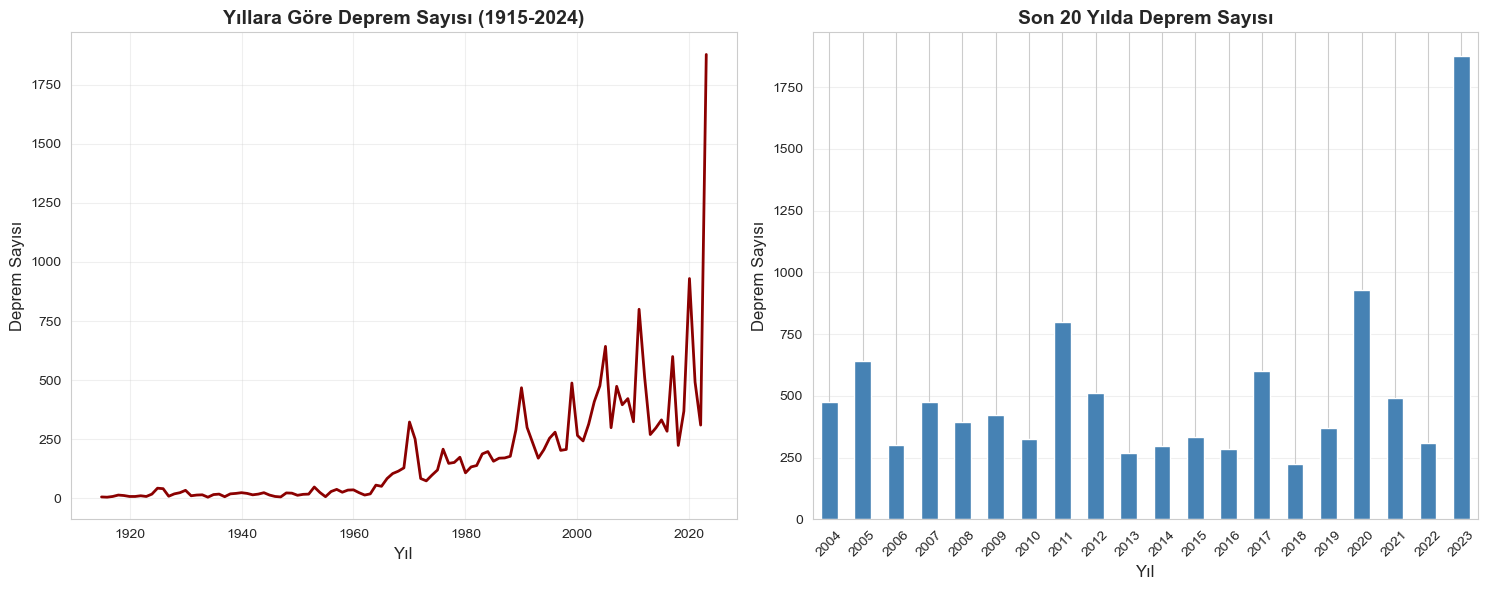

En çok deprem olan yıl: 2023 (1,878 deprem)
En az deprem olan yıl: 1916 (5 deprem)


In [6]:
# Grafik ayarları
plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")

# Yıllara göre deprem sayısı
yillik_deprem = df_kaggle.groupby('Year').size()

plt.subplot(1, 2, 1)
yillik_deprem.plot(kind='line', color='darkred', linewidth=2)
plt.title('Yıllara Göre Deprem Sayısı (1915-2024)', fontsize=14, fontweight='bold')
plt.xlabel('Yıl', fontsize=12)
plt.ylabel('Deprem Sayısı', fontsize=12)
plt.grid(True, alpha=0.3)

# Son 20 yıl için detaylı görünüm
plt.subplot(1, 2, 2)
yillik_deprem[yillik_deprem.index >= 2004].plot(kind='bar', color='steelblue')
plt.title('Son 20 Yılda Deprem Sayısı', fontsize=14, fontweight='bold')
plt.xlabel('Yıl', fontsize=12)
plt.ylabel('Deprem Sayısı', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"En çok deprem olan yıl: {yillik_deprem.idxmax()} ({yillik_deprem.max():,} deprem)")
print(f"En az deprem olan yıl: {yillik_deprem.idxmin()} ({yillik_deprem.min():,} deprem)")

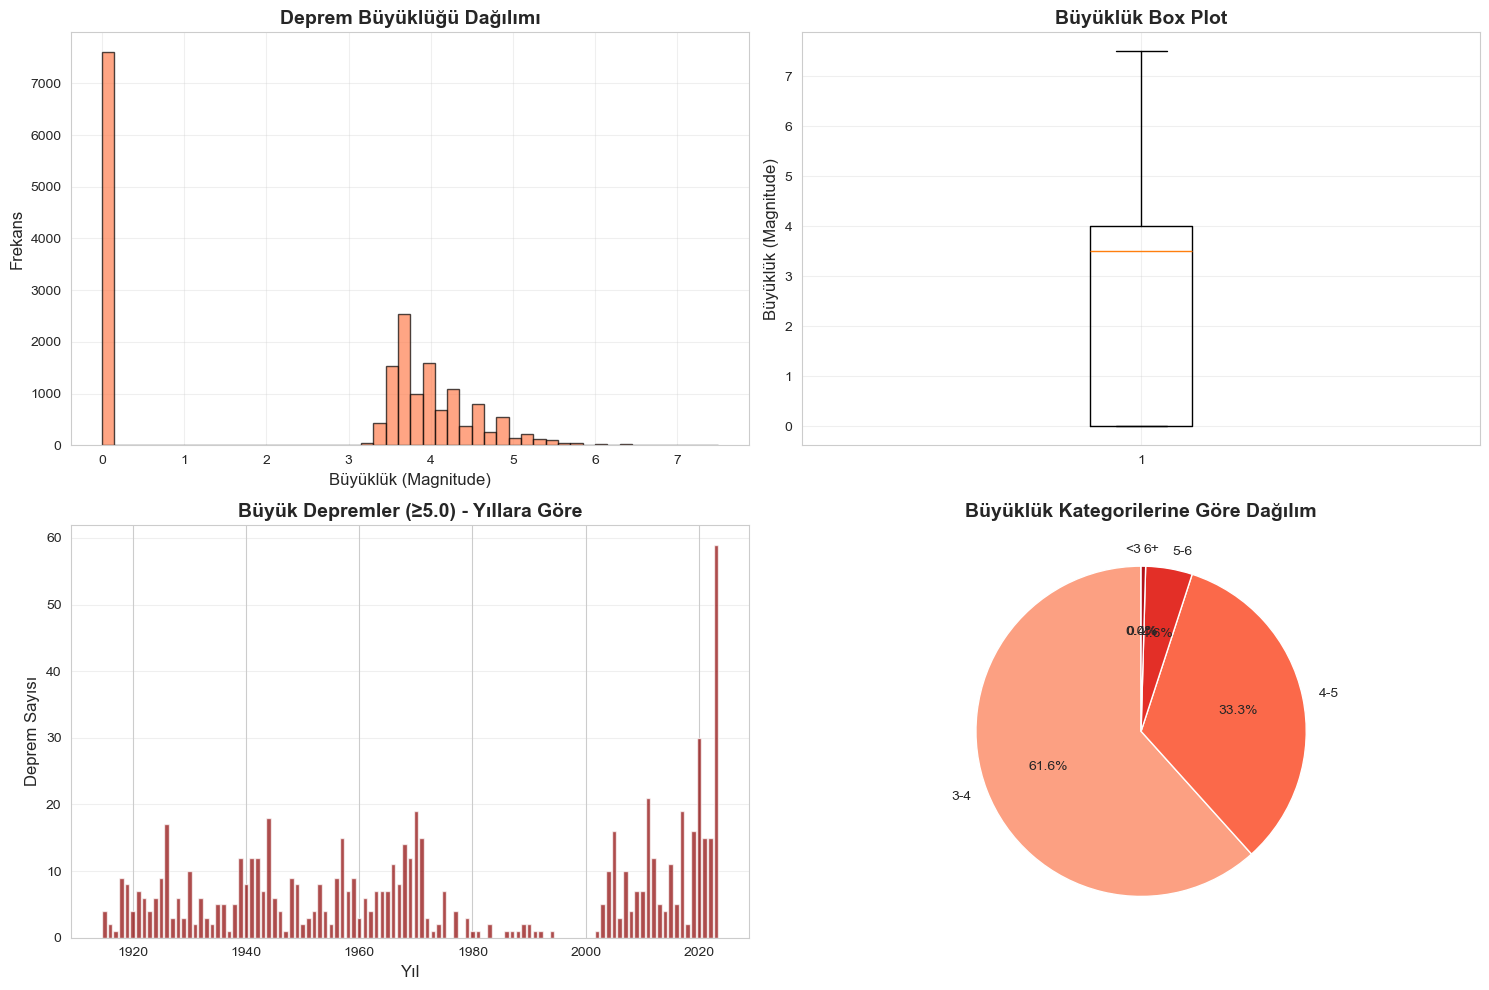


Büyüklük İstatistikleri:
Ortalama: 2.43
Medyan: 3.50
Minimum: 0.00
Maksimum: 7.50

Büyük depremler (≥5.0): 712 (3.71%)


In [7]:
# Büyüklük dağılımı
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram
axes[0, 0].hist(df_kaggle['Magnitude'].dropna(), bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Deprem Büyüklüğü Dağılımı', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Büyüklük (Magnitude)', fontsize=12)
axes[0, 0].set_ylabel('Frekans', fontsize=12)
axes[0, 0].grid(True, alpha=0.3)

# Box plot
axes[0, 1].boxplot(df_kaggle['Magnitude'].dropna(), vert=True)
axes[0, 1].set_title('Büyüklük Box Plot', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Büyüklük (Magnitude)', fontsize=12)
axes[0, 1].grid(True, alpha=0.3)

# Büyük depremler (>5.0)
buyuk_depremler = df_kaggle[df_kaggle['Magnitude'] >= 5.0]
buyuk_yillik = buyuk_depremler.groupby('Year').size()

axes[1, 0].bar(buyuk_yillik.index, buyuk_yillik.values, color='darkred', alpha=0.7)
axes[1, 0].set_title('Büyük Depremler (≥5.0) - Yıllara Göre', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Yıl', fontsize=12)
axes[1, 0].set_ylabel('Deprem Sayısı', fontsize=12)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Büyüklük kategorileri
magnitude_bins = [0, 3, 4, 5, 6, 10]
magnitude_labels = ['<3', '3-4', '4-5', '5-6', '6+']
df_kaggle['Magnitude_Category'] = pd.cut(df_kaggle['Magnitude'], bins=magnitude_bins, labels=magnitude_labels)

kategori_sayisi = df_kaggle['Magnitude_Category'].value_counts().sort_index()
axes[1, 1].pie(kategori_sayisi, labels=kategori_sayisi.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Reds', len(kategori_sayisi)))
axes[1, 1].set_title('Büyüklük Kategorilerine Göre Dağılım', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nBüyüklük İstatistikleri:")
print(f"Ortalama: {df_kaggle['Magnitude'].mean():.2f}")
print(f"Medyan: {df_kaggle['Magnitude'].median():.2f}")
print(f"Minimum: {df_kaggle['Magnitude'].min():.2f}")
print(f"Maksimum: {df_kaggle['Magnitude'].max():.2f}")
print(f"\nBüyük depremler (≥5.0): {len(buyuk_depremler):,} ({len(buyuk_depremler)/len(df_kaggle)*100:.2f}%)")

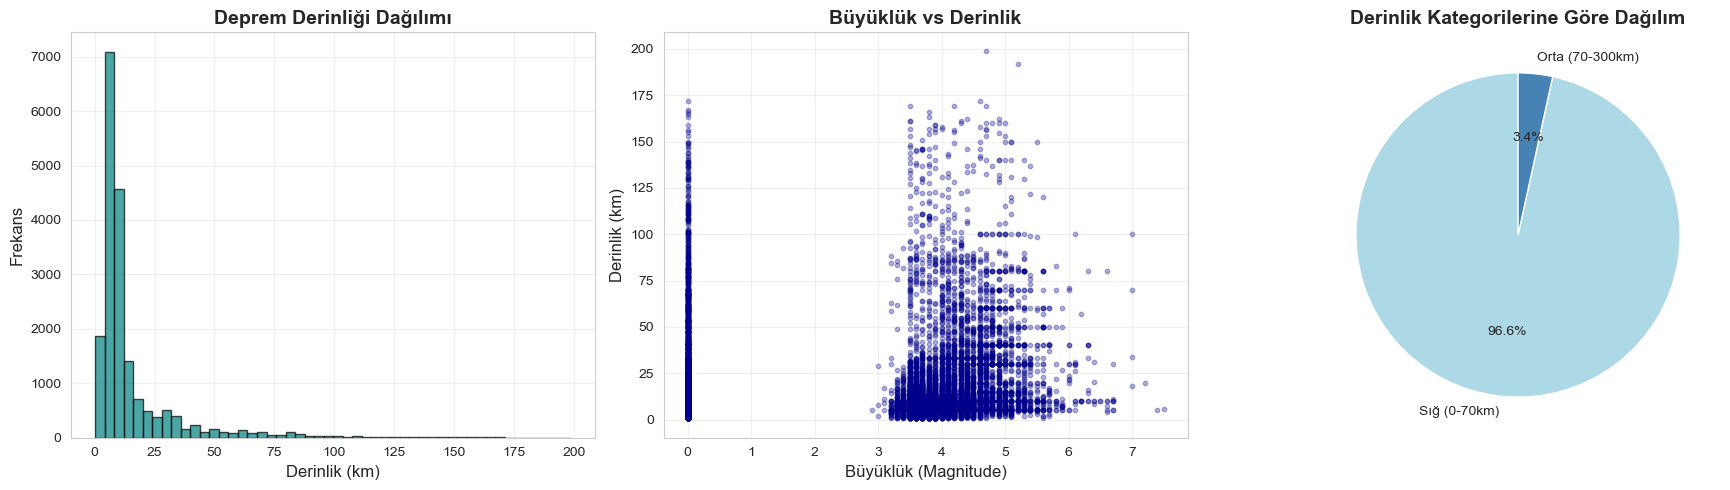


Derinlik İstatistikleri:
Ortalama derinlik: 15.51 km
Medyan derinlik: 9.00 km
Minimum derinlik: 0.20 km
Maksimum derinlik: 199.00 km


In [8]:
# Derinlik analizi
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Derinlik histogramı
axes[0].hist(df_kaggle['Depth'].dropna(), bins=50, color='teal', edgecolor='black', alpha=0.7)
axes[0].set_title('Deprem Derinliği Dağılımı', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Derinlik (km)', fontsize=12)
axes[0].set_ylabel('Frekans', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Büyüklük vs Derinlik scatter plot
axes[1].scatter(df_kaggle['Magnitude'], df_kaggle['Depth'], alpha=0.3, s=10, c='darkblue')
axes[1].set_title('Büyüklük vs Derinlik', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Büyüklük (Magnitude)', fontsize=12)
axes[1].set_ylabel('Derinlik (km)', fontsize=12)
axes[1].grid(True, alpha=0.3)

# Sığ vs Derin depremler
derinlik_kategorisi = ['Sığ (0-70km)' if d <= 70 else 'Orta (70-300km)' if d <= 300 else 'Derin (>300km)' 
                       for d in df_kaggle['Depth']]
df_kaggle['Depth_Category'] = derinlik_kategorisi
derinlik_dagilim = df_kaggle['Depth_Category'].value_counts()

axes[2].pie(derinlik_dagilim, labels=derinlik_dagilim.index, autopct='%1.1f%%', startangle=90, 
            colors=['lightblue', 'steelblue', 'navy'])
axes[2].set_title('Derinlik Kategorilerine Göre Dağılım', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nDerinlik İstatistikleri:")
print(f"Ortalama derinlik: {df_kaggle['Depth'].mean():.2f} km")
print(f"Medyan derinlik: {df_kaggle['Depth'].median():.2f} km")
print(f"Minimum derinlik: {df_kaggle['Depth'].min():.2f} km")
print(f"Maksimum derinlik: {df_kaggle['Depth'].max():.2f} km")

EN ÇOK DEPREM OLAN 20 İL
Location_clean
AKDENIZ                   3058
VAN                        997
KAHRAMANMARAS              843
MUGLA                      772
IZMIR                      693
MANISA                     587
MALATYA                    546
DENIZLI                    455
ONIKI ADALAR (AKDENIZ)     431
EGE DENIZI                 429
ANTALYA                    406
ELAZIG                     393
BINGOL                     390
BALIKESIR                  384
ERZURUM                    350
BURDUR                     332
AFYONKARAHISAR             267
HATAY                      250
ADANA                      234
ADIYAMAN                   229
Name: count, dtype: int64


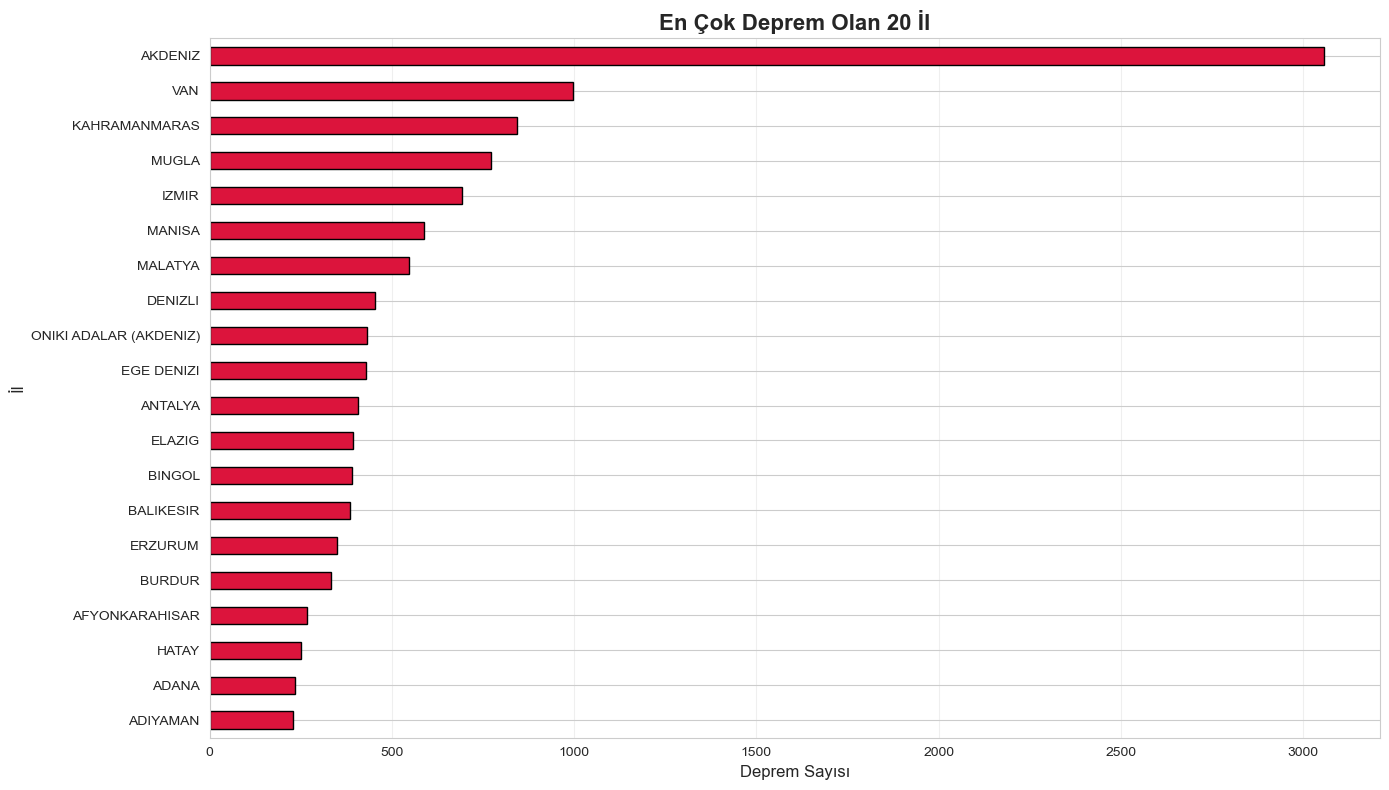

In [9]:
# İllere göre deprem sayısı (en çok etkilenen 20 il)
print("="*60)
print("EN ÇOK DEPREM OLAN 20 İL")
print("="*60)

il_dagilim = df_kaggle['Location_clean'].value_counts().head(20)
print(il_dagilim)

# Görselleştirme
plt.figure(figsize=(14, 8))
il_dagilim.plot(kind='barh', color='crimson', edgecolor='black')
plt.title('En Çok Deprem Olan 20 İl', fontsize=16, fontweight='bold')
plt.xlabel('Deprem Sayısı', fontsize=12)
plt.ylabel('İl', fontsize=12)
plt.gca().invert_yaxis()  # En büyük üstte olsun
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

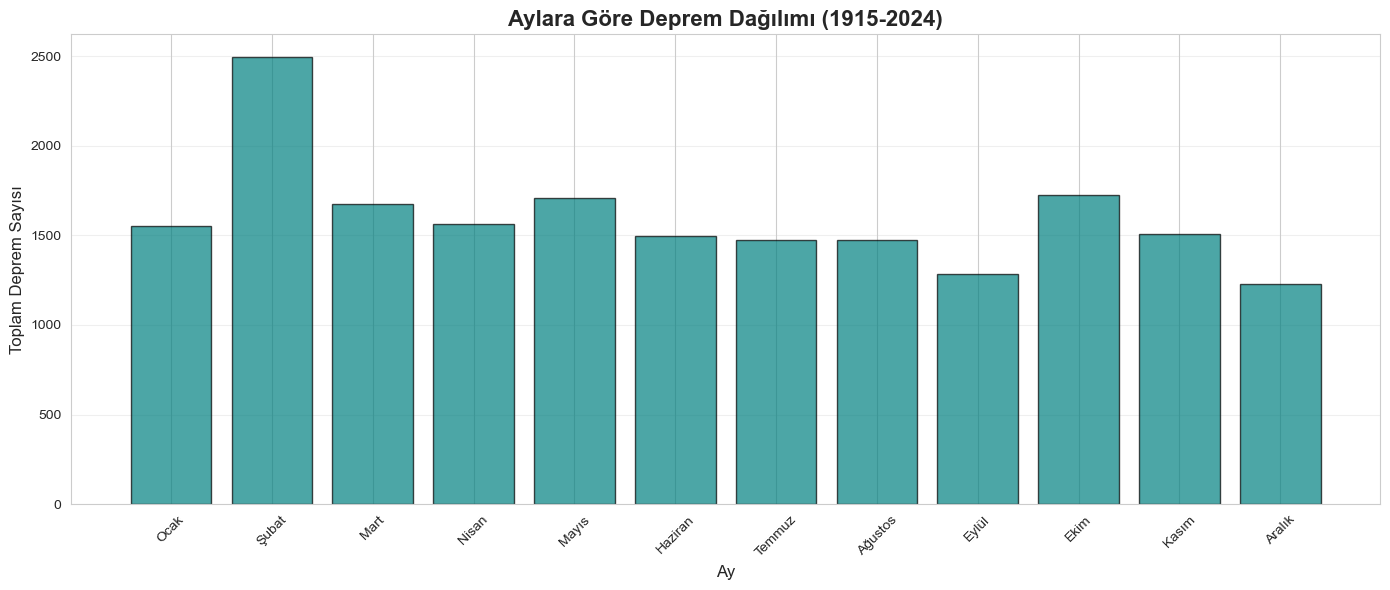


En çok deprem olan ay: Şubat (2,497 deprem)
En az deprem olan ay: Aralık (1,229 deprem)


In [10]:
# Aylara göre deprem sayısı
aylik_dagilim = df_kaggle['Month'].value_counts().sort_index()

ay_isimleri = ['Ocak', 'Şubat', 'Mart', 'Nisan', 'Mayıs', 'Haziran', 
               'Temmuz', 'Ağustos', 'Eylül', 'Ekim', 'Kasım', 'Aralık']

plt.figure(figsize=(14, 6))
plt.bar(range(1, 13), aylik_dagilim, color='teal', edgecolor='black', alpha=0.7)
plt.xticks(range(1, 13), ay_isimleri, rotation=45)
plt.title('Aylara Göre Deprem Dağılımı (1915-2024)', fontsize=16, fontweight='bold')
plt.xlabel('Ay', fontsize=12)
plt.ylabel('Toplam Deprem Sayısı', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print(f"\nEn çok deprem olan ay: {ay_isimleri[aylik_dagilim.idxmax()-1]} ({aylik_dagilim.max():,} deprem)")
print(f"En az deprem olan ay: {ay_isimleri[aylik_dagilim.idxmin()-1]} ({aylik_dagilim.min():,} deprem)")

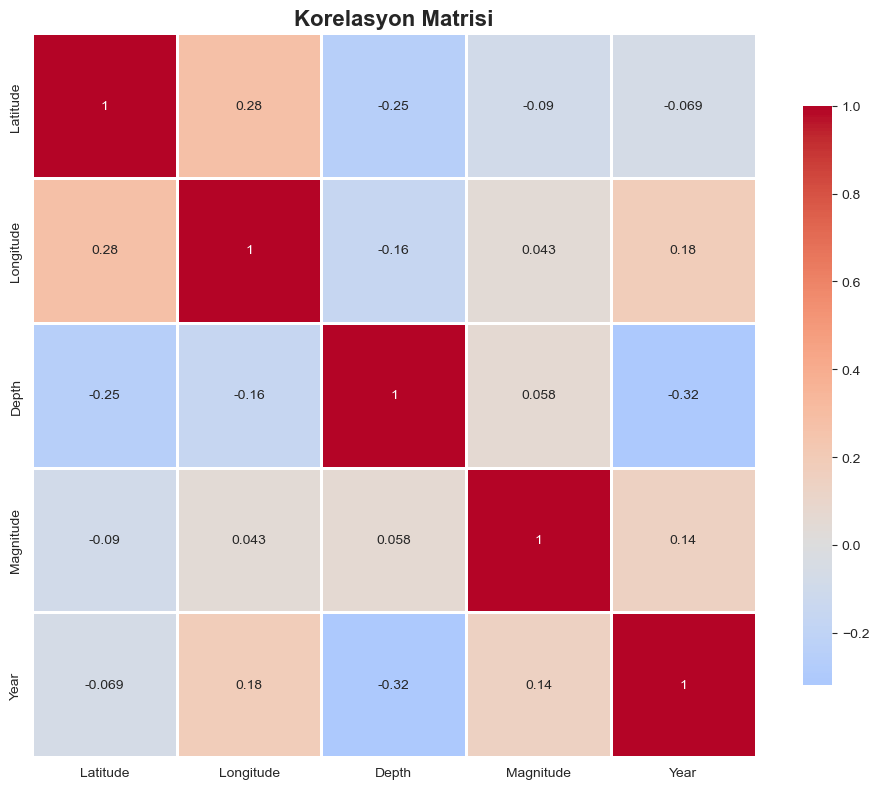


Önemli Korelasyonlar:
Depth - Year: -0.318


In [11]:
# Sayısal sütunlar arasındaki korelasyon
sayisal_sutunlar = ['Latitude', 'Longitude', 'Depth', 'Magnitude', 'Year']
korelasyon = df_kaggle[sayisal_sutunlar].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(korelasyon, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Korelasyon Matrisi', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nÖnemli Korelasyonlar:")
print("="*60)
for i in range(len(korelasyon.columns)):
    for j in range(i+1, len(korelasyon.columns)):
        if abs(korelasyon.iloc[i, j]) > 0.3:  # 0.3'ten büyük korelasyonlar
            print(f"{korelasyon.columns[i]} - {korelasyon.columns[j]}: {korelasyon.iloc[i, j]:.3f}")

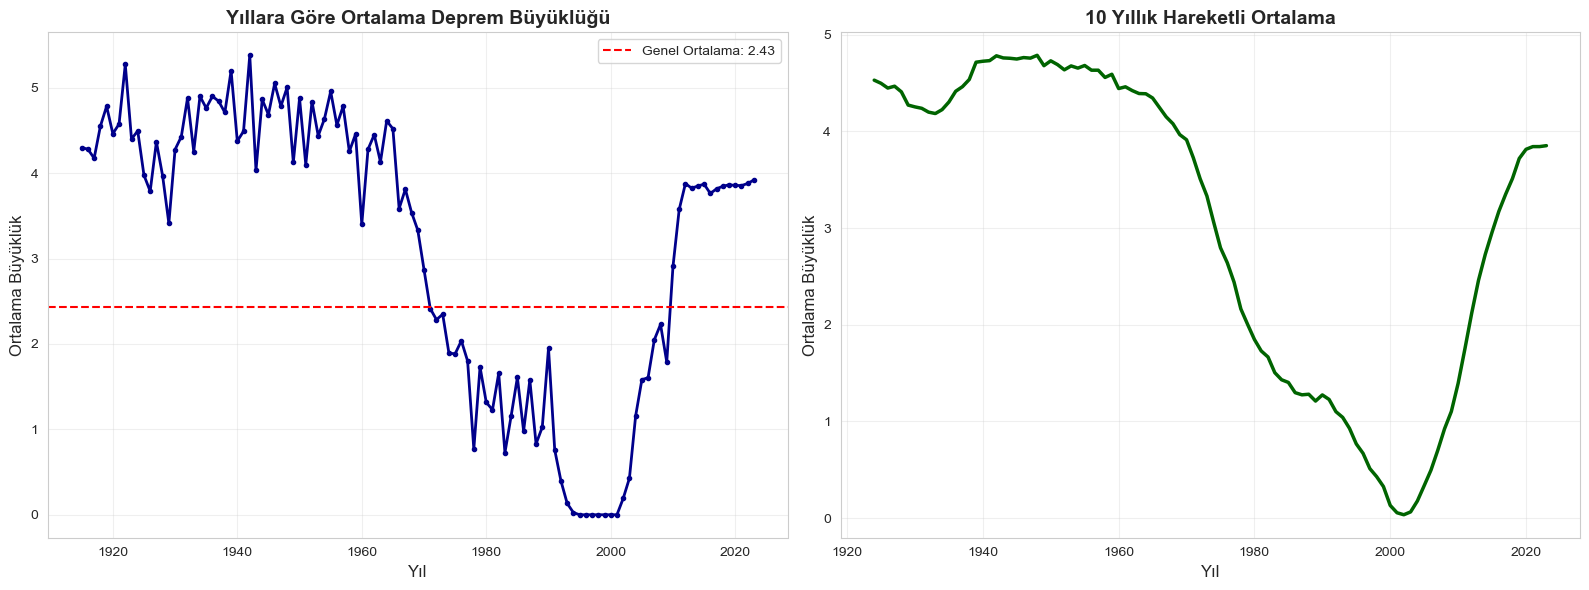

In [12]:
# Yıllara göre ortalama büyüklük
yillik_ort_buyukluk = df_kaggle.groupby('Year')['Magnitude'].mean()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Sol: Ortalama büyüklük trendi
axes[0].plot(yillik_ort_buyukluk.index, yillik_ort_buyukluk.values, 
             color='darkblue', linewidth=2, marker='o', markersize=3)
axes[0].set_title('Yıllara Göre Ortalama Deprem Büyüklüğü', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Yıl', fontsize=12)
axes[0].set_ylabel('Ortalama Büyüklük', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=df_kaggle['Magnitude'].mean(), color='r', linestyle='--', 
                label=f'Genel Ortalama: {df_kaggle["Magnitude"].mean():.2f}')
axes[0].legend()

# Sağ: 10 yıllık hareketli ortalama
hareketli_ort = yillik_ort_buyukluk.rolling(window=10).mean()
axes[1].plot(hareketli_ort.index, hareketli_ort.values, 
             color='darkgreen', linewidth=2.5)
axes[1].set_title('10 Yıllık Hareketli Ortalama', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Yıl', fontsize=12)
axes[1].set_ylabel('Ortalama Büyüklük', fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

TARİHTE KAYITLARA GEÇEN EN BÜYÜK 10 DEPREM
      Date  Magnitude  Depth                             Location_clean  Year
2023-02-06        7.5    5.5                                  GAZIANTEP  2023
2023-02-06        7.4    5.0                              KAHRAMANMARAS  2023
1939-12-26        7.2   20.0                                   ERZINCAN  1939
1970-03-28        7.0   18.0 KIZIK-CAVDARHISAR (KÜTAHYA) [NORTH 0.8 KM]  1970
1964-10-06        7.0   34.0                                      BURSA  1964
1930-05-06        7.0   70.0                 TÜRKIYE-IRAN SINIR BÖLGESI  1930
1926-06-26        7.0  100.0                     ONIKI ADALAR (AKDENIZ)  1926
2020-10-30        6.7   11.2                                 EGE DENIZI  2020
2020-01-24        6.7    5.0                                     ELAZIG  2020
2011-10-23        6.7    5.0                                        VAN  2011


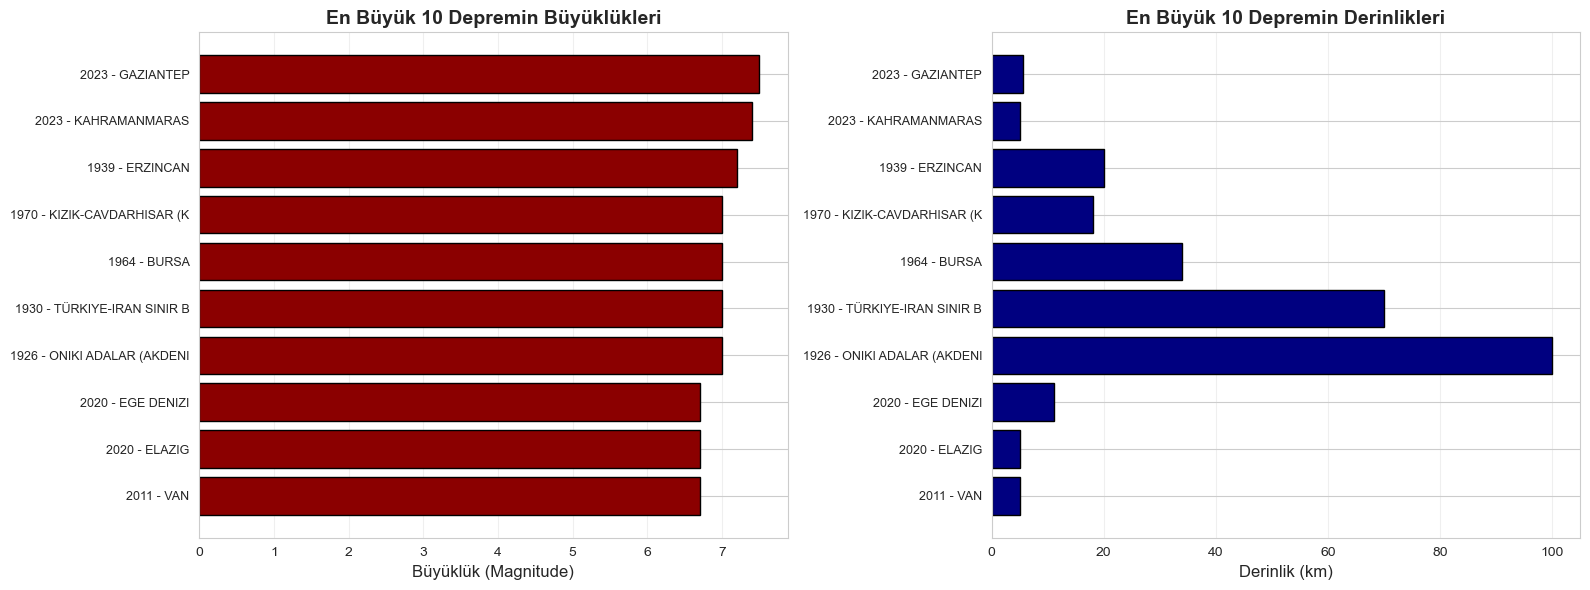

In [14]:
# En büyük 10 deprem
en_buyuk_10 = df_kaggle.nlargest(10, 'Magnitude')[['Date', 'Magnitude', 'Depth', 'Location_clean', 'Year']]

print("="*80)
print("TARİHTE KAYITLARA GEÇEN EN BÜYÜK 10 DEPREM")
print("="*80)
print(en_buyuk_10.to_string(index=False))

# Görselleştirme
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Sol: Büyüklük grafiği
axes[0].barh(range(10), en_buyuk_10['Magnitude'].values, color='darkred', edgecolor='black')
axes[0].set_yticks(range(10))
axes[0].set_yticklabels([f"{row['Year']} - {row['Location_clean'][:20]}" 
                          for _, row in en_buyuk_10.iterrows()], fontsize=9)
axes[0].set_xlabel('Büyüklük (Magnitude)', fontsize=12)
axes[0].set_title('En Büyük 10 Depremin Büyüklükleri', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')

# Sağ: Derinlik grafiği
axes[1].barh(range(10), en_buyuk_10['Depth'].values, color='navy', edgecolor='black')
axes[1].set_yticks(range(10))
axes[1].set_yticklabels([f"{row['Year']} - {row['Location_clean'][:20]}" 
                          for _, row in en_buyuk_10.iterrows()], fontsize=9)
axes[1].set_xlabel('Derinlik (km)', fontsize=12)
axes[1].set_title('En Büyük 10 Depremin Derinlikleri', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

EM-DAT DATASET
Toplam satır sayısı: 110

Sütunlar:
['DisNo.', 'Historic', 'Classification Key', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region', 'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal', 'Declaration', "AID Contribution ('000 US$)", 'Magnitude', 'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day', 'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless', 'Total Affected', "Reconstruction Costs ('000 US$)", "Reconstruction Costs, Adjusted ('000 US$)", "Insured Damage ('000 US$)", "Insured Damage, Adjusted ('000 US$)", "Total Damage ('000 US$)", "Total Damage, Adjusted ('000 US$)", 'CPI', 'Admin Units', 'Entry Date', 'Last Update']

Ölüm kaydı olan deprem sayısı: 90
Toplam ölüm sayısı: 135,699

EN ÖLÜMCÜL 10 DEPREM
 Start Year                                                

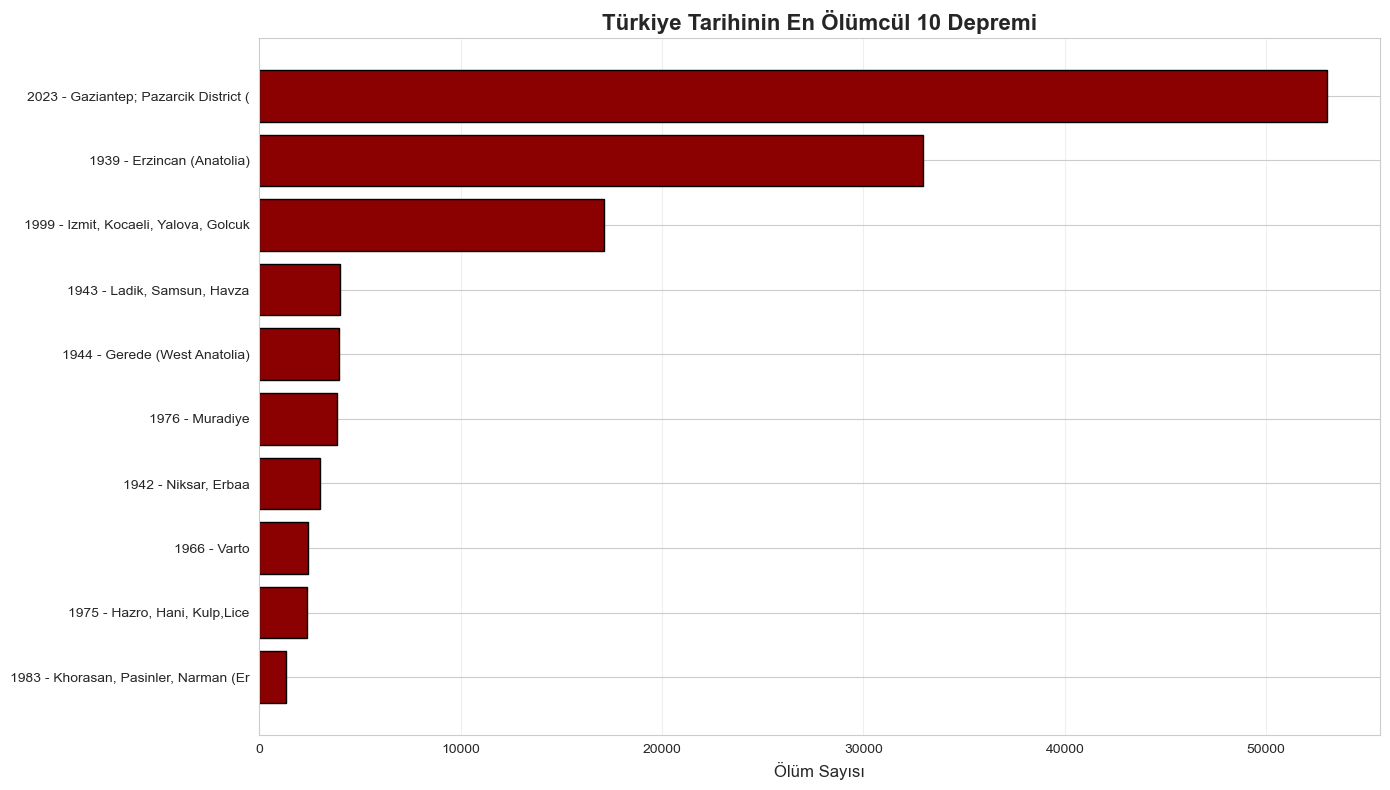

In [15]:
# EM-DAT verisini incele
print("="*60)
print("EM-DAT DATASET")
print("="*60)
print(f"Toplam satır sayısı: {len(df_emdat):,}")
print(f"\nSütunlar:\n{df_emdat.columns.tolist()}")

# Ölüm sayısı olan kayıtlar
if 'Total Deaths' in df_emdat.columns:
    olum_var = df_emdat[df_emdat['Total Deaths'].notna()]
    print(f"\nÖlüm kaydı olan deprem sayısı: {len(olum_var)}")
    print(f"Toplam ölüm sayısı: {olum_var['Total Deaths'].sum():,.0f}")
    
    # En ölümcül 10 deprem
    print("\n" + "="*60)
    print("EN ÖLÜMCÜL 10 DEPREM")
    print("="*60)
    en_olumcul = olum_var.nlargest(10, 'Total Deaths')[['Start Year', 'Location', 
                                                           'Magnitude', 'Total Deaths']]
    print(en_olumcul.to_string(index=False))
    
    # Görselleştirme
    plt.figure(figsize=(14, 8))
    en_olumcul_sorted = en_olumcul.sort_values('Total Deaths')
    plt.barh(range(10), en_olumcul_sorted['Total Deaths'].values, color='darkred', edgecolor='black')
    plt.yticks(range(10), [f"{int(row['Start Year'])} - {str(row['Location'])[:30]}" 
                           for _, row in en_olumcul_sorted.iterrows()], fontsize=10)
    plt.xlabel('Ölüm Sayısı', fontsize=12)
    plt.title('Türkiye Tarihinin En Ölümcül 10 Depremi', fontsize=16, fontweight='bold')
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()
else:
    print("\n⚠️ EM-DAT verisinde 'Total Deaths' sütunu bulunamadı")